# Analysis of Data Sources from PV

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.neighbors import NearestNeighbors
from scipy.spatial import distance_matrix
import numpy as np
from scipy.stats import skew
from scipy.stats import f_oneway
import seaborn as sns
import matplotlib.dates as mdates
import os
from pathlib import Path

In [15]:
# Get the path to the current script
current_dir = Path.cwd()

# Go one level up
current_dir = current_dir.parent



NAME_FILE = "A6_20241002_135431_ALPS_0"+".csv"

FONTSIZE_MAIN = 14
FONTSIZE_SEC = 12

In [16]:

result = pd.read_csv(current_dir / "datasets" / "raw" / NAME_FILE, sep=',', encoding='ISO-8859-1')

In [17]:
result.columns[-1]

'ANOMALY?'

In [18]:
result['CURRENTTIMESTAMP'] = pd.to_datetime(result['CURRENTTIMESTAMP'])#.dt.tz_convert('UTC')



In [19]:
min_date = result.CURRENTTIMESTAMP.min()
print("Min Date:", min_date)


Min Date: 2024-10-02 13:54:58.608000+00:00


In [20]:
max_date = result.CURRENTTIMESTAMP.max()
print("Max Date:", max_date)

Max Date: 2024-10-02 15:04:57.646000+00:00


In [21]:

min_date_filter = result['CURRENTTIMESTAMP']>="2023-08-08 16:55"
Components_final = result[min_date_filter]
print("Min Date:", min_date)

Min Date: 2024-10-02 13:54:58.608000+00:00


In [22]:
max_date_filter = Components_final['CURRENTTIMESTAMP']<="2025-08-08 17:03"
Components_final = Components_final[max_date_filter]
print("Max Date:", max_date)

Max Date: 2024-10-02 15:04:57.646000+00:00


In [23]:
print("Length:",len(Components_final))

Length: 4200


## Analysing Datasets

In [24]:

result = Components_final

### Spectrograms in Time

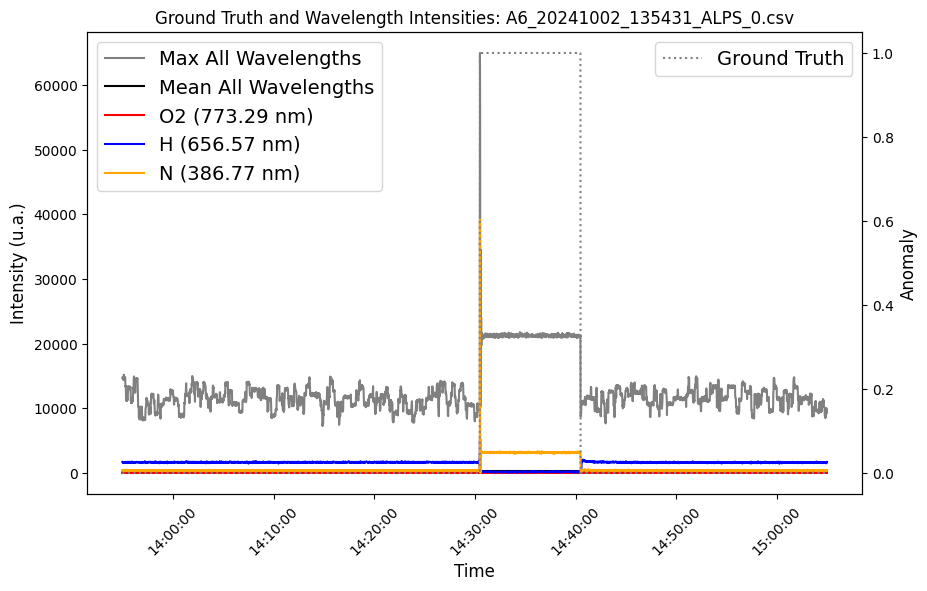

In [25]:


fig, ax1 = plt.subplots(figsize=(10, 6))

#ax1.plot(result.CURRENTTIMESTAMP, result.iloc[:, 1:2048].max(axis=1), color="black", label="Max")
ax1.plot(result.CURRENTTIMESTAMP, result.iloc[:, 1:2048].max(axis=1), color="grey", label="Max All Wavelengths")
ax1.plot(result.CURRENTTIMESTAMP, result.iloc[:, 1:2048].mean(axis=1), color="black", label="Mean All Wavelengths")

# Plot 'O2' for Wavelength: 773.29
ax1.plot(result.CURRENTTIMESTAMP, result["773.29"], color="Red", label="O2 (773.29 nm)")

# Plot 'H' for Wavelength: 656.57
ax1.plot(result.CURRENTTIMESTAMP, result["656.57"], color="Blue", label="H (656.57 nm)")

# Plot 'N' for Wavelength: 386.77
ax1.plot(result.CURRENTTIMESTAMP, result["386.77"], color="Orange", label="N (386.77 nm)")


ax1.set_xlabel('Time', fontsize=FONTSIZE_SEC)
ax1.set_ylabel('Intensity (u.a.)', fontsize=FONTSIZE_SEC)
ax1.set_title('Ground Truth and Wavelength Intensities: '+ NAME_FILE, fontsize=FONTSIZE_SEC)
ax1.legend(loc='upper left', fontsize=FONTSIZE_MAIN)

# Format x-axis for hours, minutes, and seconds
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=45)

# Create a second y-axis for Ground Truth
ax2 = ax1.twinx()
ax2.plot(result.CURRENTTIMESTAMP, result["ANOMALY?"], color="Grey", linestyle=":", label="Ground Truth")
ax2.set_ylabel('Anomaly', fontsize=FONTSIZE_SEC)
ax2.legend(loc='upper right', fontsize=FONTSIZE_MAIN)






plt.show()


### Example of Spectral Data

/tmp/ipykernel_1936068/1878472129.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc='upper right', fontsize=12, frameon=True)


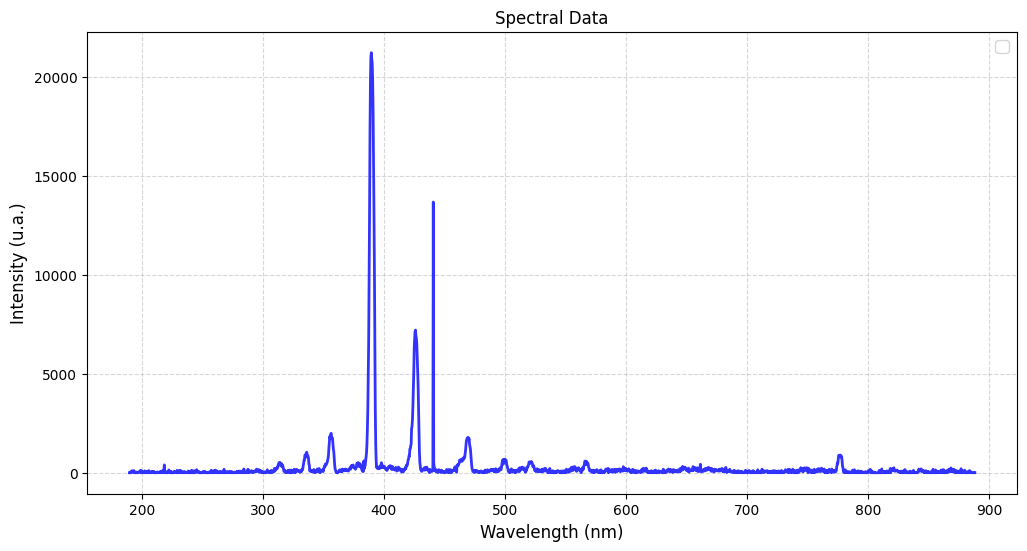

In [26]:
max_pressure_idx = 2500
index_instance = max_pressure_idx + 1
fig, ax1 = plt.subplots(figsize=(12, 6))  # Slightly wider for better visibility

# Convert wavelength columns to float and sort
wavelengths = result.columns[1:2048].astype(float)
intensities = result.iloc[index_instance, 1:2048]

# Plot with enhancements
ax1.plot(wavelengths, intensities, color="blue", linewidth=2, alpha=0.8)

# Labels & Title
ax1.set_xlabel('Wavelength (nm)', fontsize=FONTSIZE_SEC)
ax1.set_ylabel('Intensity (u.a.)', fontsize=FONTSIZE_SEC)
ax1.set_title(f'Spectral Data', fontsize=FONTSIZE_SEC)

# Grid for better readability
ax1.grid(True, linestyle="--", alpha=0.5)

# Legend
ax1.legend(loc='upper right', fontsize=12, frameon=True)

plt.show()
